In [ ]:
!pip freeze
!pip3 install numpy
!pip3 install pandas
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install pydotplus
!pip3 install six

# Problem 8: Linear movies

In [72]:
import pandas as pd
import numpy as np

# help from: https://medium.com/analytics-vidhya/simple-linear-regression-with-example-using-numpy-e7b984f0d15e

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv')
df = df.sample(frac=1)

total = df.shape[0]
train_size = int(round(total*0.7))

# splitting now for 8.5
df_train = df.iloc[:train_size,:]
df_test = df.iloc[train_size:,:]

rottenTom = df[['RottenTomatoes_User','RottenTomatoes']]

matrix = np.array(rottenTom.values, 'int')

# assign input and targ var
x = matrix[:,0]
y = matrix[:,1]

In [3]:
df_train.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

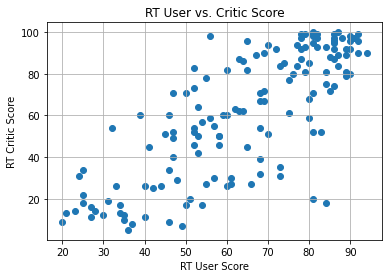

In [73]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.ylabel('RT Critic Score')
plt.xlabel('RT User Score')
plt.title('RT User vs. Critic Score')
plt.grid()
plt.show()

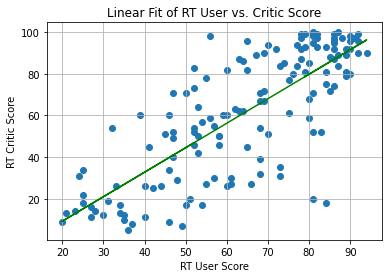

In [74]:
# help from https://www.delftstack.com/howto/matplotlib/plot-numpy-linear-fit-matplotlib-python/
plt.scatter(x,y)
plt.ylabel('RT Critic Score')
plt.xlabel('RT User Score')
plt.title('Linear Fit of RT User vs. Critic Score')

linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(x,linear_model_fn(x),color="green")

plt.grid()
plt.show()

# Part 2: Easy Linear

In [75]:
# help from https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn
from sklearn.linear_model import LinearRegression

sk_x = np.array(x).reshape((-1,1))
sk_y = np.array(y)

fit = LinearRegression().fit(sk_x,sk_y)

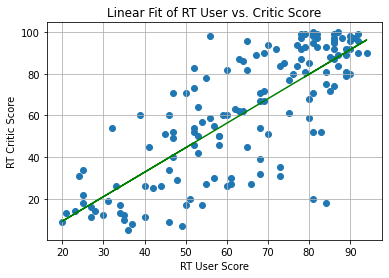

In [76]:
plt.scatter(x,y)
plt.ylabel('RT Critic Score')
plt.xlabel('RT User Score')
plt.title('Linear Fit of RT User vs. Critic Score')

plt.plot(x,fit.predict(sk_x),color="green")

plt.grid()
plt.show()

# Part 3: Not So Linear

In [77]:
# help from https://data36.com/polynomial-regression-python-scikit-learn/
from sklearn.preprocessing import PolynomialFeatures

quad = PolynomialFeatures(degree=2, include_bias=False)
cub = PolynomialFeatures(degree=3, include_bias=False)
quad_feat = quad.fit_transform(sk_x)
cub_feat = cub.fit_transform(sk_x)
quad_fit = LinearRegression().fit(quad_feat, sk_y)
cub_fit = LinearRegression().fit(cub_feat, sk_y)

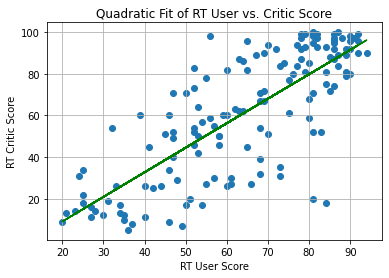

In [78]:
plt.scatter(x,y)
plt.ylabel('RT Critic Score')
plt.xlabel('RT User Score')
plt.title('Quadratic Fit of RT User vs. Critic Score')

plt.plot(x,quad_fit.predict(quad_feat),color="green")

plt.grid()
plt.show()

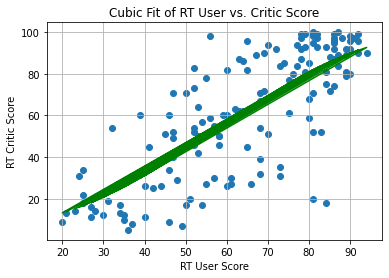

In [79]:
plt.scatter(x,y)
plt.ylabel('RT Critic Score')
plt.xlabel('RT User Score')
plt.title('Cubic Fit of RT User vs. Critic Score')

plt.plot(x,cub_fit.predict(cub_feat),color="green")

plt.grid()
plt.show()

# Part 4: Multiple

In [80]:
rottenTom = df[['RottenTomatoes_User','IMDB','RottenTomatoes']]

matrix = np.array(rottenTom.values, 'int')

# assign input and targ var
x = matrix[:,0]
y = matrix[:,1]
z = matrix[:,2]

In [81]:
# help from: https://www.kaggle.com/code/spidy20/3d-visualization-of-multiple-linear-regression

x_3d, y_3d = np.meshgrid(np.linspace(df.RottenTomatoes_User.min(), 
                                     df.RottenTomatoes_User.max(), 146), 
                         np.linspace(df.IMDB.min(), df.IMDB.max(), 146))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


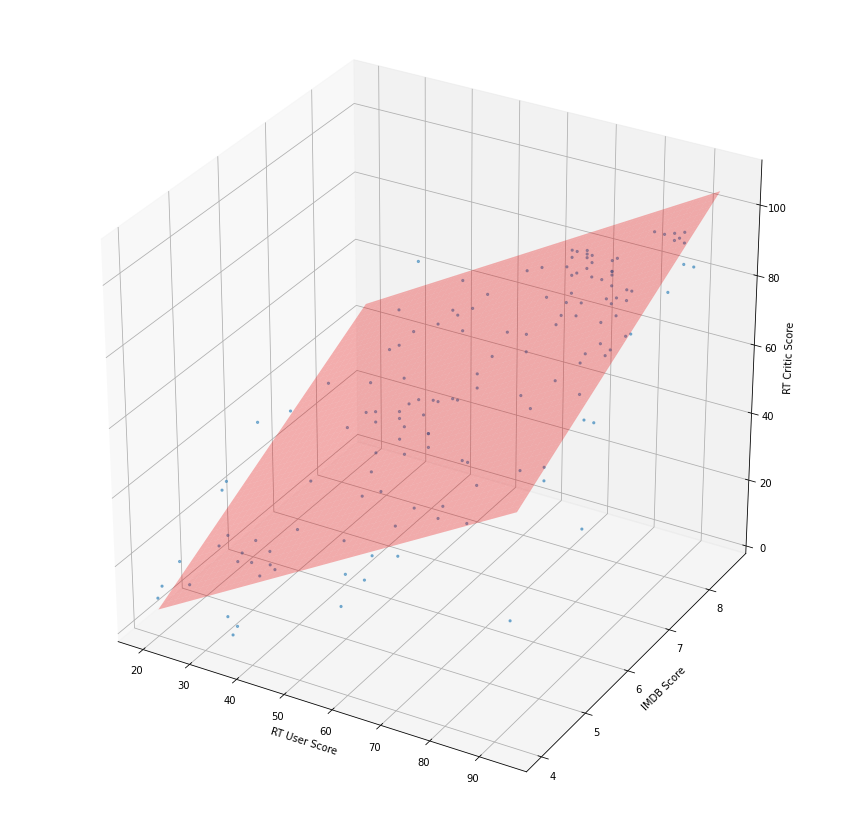

In [82]:
fig = plt.figure(figsize=(15,15))
third_dimen = fig.add_subplot(111, projection='3d')
third_dimen.scatter(x, y, z, marker='.', alpha=0.5)
third_dimen.set_xlabel('RT User Score')
third_dimen.set_ylabel('IMDB Score')
third_dimen.set_zlabel('RT Critic Score')

user_and_imdb = pd.DataFrame({'RottenTomatoes_User': x_3d.ravel(),
                              'IMDB': y_3d.ravel()})
model = LinearRegression().fit(matrix[:,:2],z)
fit = np.array(model.predict(user_and_imdb))

third_dimen.plot_surface(x_3d, y_3d, fit.reshape(x_3d.shape), color='red', 
                         alpha=0.3)

plt.show()

# Part 5: Regularize

In [85]:
from sklearn.linear_model import Ridge

# no real reason to make film one-hot encoding, not useful for predicting  
# Rotten Tomatoes score, so just gping to drop
df_train = df_train.drop('FILM', axis=1)
df_test = df_test.drop('FILM', axis=1)

train = df_train.drop('RottenTomatoes', axis=1)
train_label = df_train['RottenTomatoes']
test = df_test.drop('RottenTomatoes', axis=1)
test_label = df_test['RottenTomatoes']

In [94]:
alphas = [0.1,1,2]
coefs = []

for a in alphas:
  clf = Ridge(alpha=a)
  clf.fit(train, train_label)
  coefs.append(clf.coef_)
  print("test error: ", 1-clf.score(test, test_label))

test error:  2.6665458856989233e-05
test error:  0.0008573457458442846
test error:  0.0018111217478022912


Clearly 0.1 is the best regularization parameter, based off test errors.

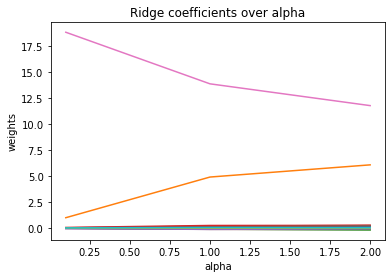

In [95]:
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients over alpha')
plt.show()

In [103]:
last_coef = coefs[2]
col = train.columns.tolist()
print(last_coef)

[ 2.77548495e-02  1.13247477e-01  5.86173131e-02  2.68922184e-01
 -9.92076119e-02 -1.44020867e-01  1.17885788e+01  1.38774247e-03
  5.66237387e-03  2.93086566e-02  1.34461092e-01  6.09014040e+00
 -1.68341678e-01  2.66299114e-01 -6.49486789e-02  2.43259915e-01
 -9.07559791e-04  2.09310488e-06  1.12030091e-05  4.48132555e-02]


In [101]:
print(train.columns)

Index(['RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Fandango_Stars', 'Fandango_Ratingvalue', 'RT_norm', 'RT_user_norm',
       'Metacritic_norm', 'Metacritic_user_nom', 'IMDB_norm', 'RT_norm_round',
       'RT_user_norm_round', 'Metacritic_norm_round',
       'Metacritic_user_norm_round', 'IMDB_norm_round',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Fandango_votes',
       'Fandango_Difference'],
      dtype='object')


As seen by the chart above, there were only two features that were deemed useful for predictions. By matching the coefficients to the features, it seems only RT_norm and RT_norm_round were useful. All the rest had pretty low weights.